# MATH901 : Recherche opérationnelle

## TP1 Première approche des graphes en Python

Nous allons utiliser une matrice d'adjacence pour représenter un graphe.

In [3]:
# les imports

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Fonction d'affichage avec la librairie `networkx`. Attention, la librairie note les sommets à partir de 0.

In [4]:
def show(mat, title="", seed=1):
    plt.figure()
    if (mat == mat.T).all():
        G = nx.from_numpy_array(mat)
    else:
        G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.title(title)
    if np.any(mat > 1): # weighted graphs
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))
        # curve edges that are too close
        # for e in G.edges():
        #     if labels[e] > 1:
        #         nx.draw_networkx_edges(G, pos=nx.spring_layout(G, seed=seed), edgelist=[e], connectionstyle='arc3, rad = 0.2')
        
        nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G, seed=seed), edge_labels=labels, )
    else:
        nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))
    plt.show(block=False)

Matrice orientée

In [5]:
# Orienté         0  1  2  3  4  5  6
mat1 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [0, 0, 0, 0, 1, 0, 1], # 1
                 [0, 0, 0, 1, 0, 0, 0], # 2
                 [0, 1, 1, 0, 0, 0, 0], # 3
                 [0, 0, 1, 0, 1, 1, 0], # 4
                 [0, 1, 0, 0, 1, 0, 1], # 5
                 [0, 0, 0, 0, 0, 0, 0]])# 6


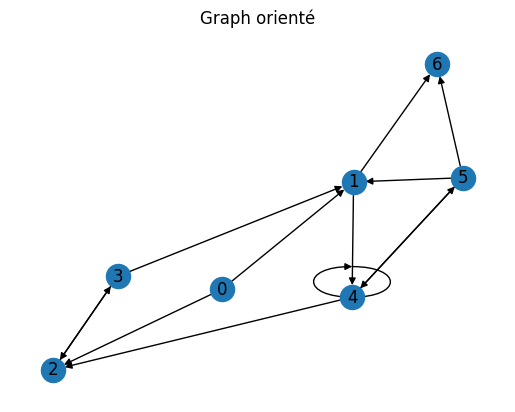

In [6]:
show(mat1, "Graph orienté")

Matrice non orientée

In [7]:

# Non-orienté     0  1  2  3  4  5  6
mat2 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [1, 0, 0, 1, 1, 1, 1], # 1
                 [1, 0, 0, 1, 1, 0, 0], # 2
                 [0, 1, 1, 0, 0, 0, 0], # 3
                 [0, 1, 1, 0, 1, 1, 0], # 4
                 [0, 1, 0, 0, 1, 0, 1], # 5
                 [0, 1, 0, 0, 0, 1, 0]])# 6


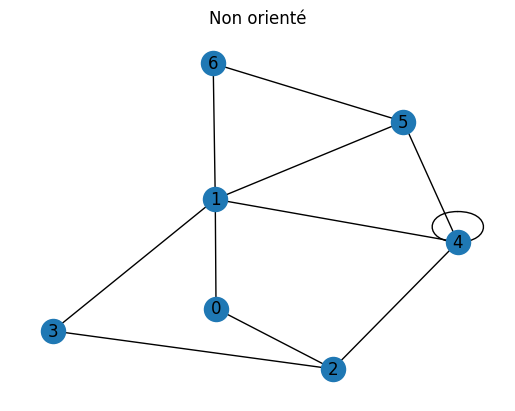

In [8]:
show(mat2, "Non orienté")

Calculons maintenant le degré pour un graph non orienté

In [9]:
def deg_non_oriented(mat):
    if not (mat == mat.T).all():
        raise Exception("not a symetric matrix!")
    for n in range(len(mat)):
        print(f"{n} deg={sum(mat[n,:])}")

deg_non_oriented(mat2)

0 deg=2
1 deg=5
2 deg=3
3 deg=2
4 deg=4
5 deg=3
6 deg=2


Et pour un graph orienté les degrés entrants et sortants de chaque noeud

In [10]:
def deg_in(mat, node):
    return sum(mat[:, node])

def deg_out(mat, node):
    return sum(mat[node, :])

def deg_oriented(mat):
    for n in range(len(mat)):
        print(f"{n} deg_out={deg_out(mat, n)} deg_in={deg_in(mat, n)}")

deg_oriented(mat1)

0 deg_out=2 deg_in=0
1 deg_out=2 deg_in=3
2 deg_out=1 deg_in=3
3 deg_out=2 deg_in=1
4 deg_out=3 deg_in=3
5 deg_out=3 deg_in=1
6 deg_out=0 deg_in=2


Voyons maintenant la liste des sommets à distance 2 d'un sommet donné

In [11]:
def dist_from(mat, n, dist):
    # mat = puis(mat, dist)
    mat = np.linalg.matrix_power(mat, dist)
    print(f"from {n=} in {dist} steps:", end=" [ ")
    for i in range(len(mat)):
        if mat[n, i] > 0:
            print(i+1, end=" ")
    print("]")

dist_from(mat1, 0, 2)

from n=0 in 2 steps: [ 4 5 7 ]


In [12]:
def dist_min(mat, dep, arr):
    matO = mat.copy()
    dist = 0
    while mat[dep, arr] == 0:
        dist += 1
        mat = np.matmul(mat, matO)
        if dist > len(mat):
            return -1
    print(f"from {dep} to {arr} in {dist} steps")

dist_min(mat1, 2, 6)

from 2 to 6 in 2 steps


On cherche mainteant à calculer les composantes connexes d'un graph

In [13]:
def nb_composantes_connexes(mat):
    dist = mat.astype(float)
    dist += np.identity(len(mat))  # To avoid just rotating the matrix
    dist = np.linalg.matrix_power(dist, len(mat))  # to get all ateinable nodes
    cc_count = 1  # 1 because we assume the graph is connected in best case
    for i in range(len(mat)):
        if dist[i, cc_count-1] == 0:
            cc_count += 1
    return cc_count

print(f"Nombre de composantes connexes dans le graph orienté: {nb_composantes_connexes(mat1)}")
print(f"Nombre de composantes connexes dans le graph non-orienté: {nb_composantes_connexes(mat2)}")

Nombre de composantes connexes dans le graph orienté: 3
Nombre de composantes connexes dans le graph non-orienté: 1


Maintenant le rang de chaque sommet pour un graph orienté sans cycle :

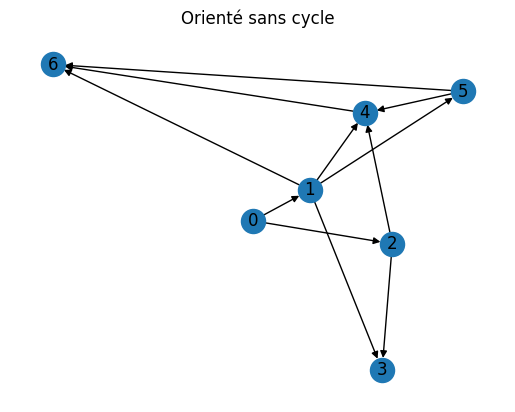

In [14]:
mat3 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [0, 0, 0, 1, 1, 1, 1], # 1
                 [0, 0, 0, 1, 1, 0, 0], # 2
                 [0, 0, 0, 0, 0, 0, 0], # 3
                 [0, 0, 0, 0, 0, 0, 1], # 4
                 [0, 0, 0, 0, 1, 0, 1], # 5
                 [0, 0, 0, 0, 0, 0, 0]])# 6
show(mat3, "Orienté sans cycle")

rang de k=0 est 0
rang de k=1 est 1
rang de k=2 est 1
rang de k=3 est 2
rang de k=5 est 2
rang de k=4 est 3
rang de k=6 est 4


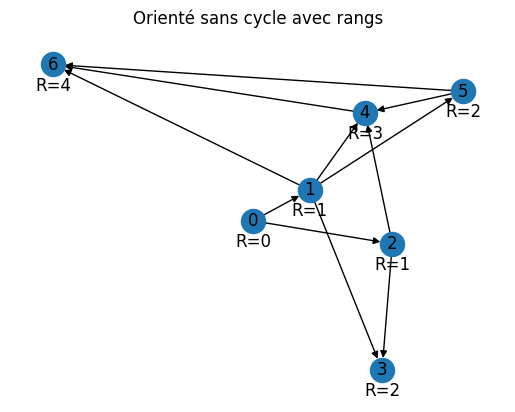

In [15]:
def keep_only(mat, nodes: list[int]):
    mat = mat.copy()
    for i in range(len(mat)):
        if i not in nodes:
            mat[i, :] = 0
            mat[:, i] = 0
    return mat

def is_cyclic(mat):
    mat = mat.copy()
    for i in range(len(mat)):
        mat[i, i] = 0
    return np.linalg.matrix_power(mat, len(mat)).sum() > 0

def rang(mat):
    if is_cyclic(mat):
        raise Exception("Graph is cyclic")

    r = {} # rangs de chaque sommet
    Y = list(range(len(mat))) # noeuds à traiter
    current_rang = 0
    # INIT
    # On enlève les noeuds sans prédecesseurs
    for n in Y:
        if deg_in(mat, n) == 0:
            r[n] = current_rang
            Y.remove(n)

    while len(Y) > 0:
        current_rang += 1
        # On enlève les noeuds sans prédecesseurs
        mat = keep_only(mat, Y)
        for n in Y[:]: # par rapport à l'état actuel de Y
            if deg_in(mat, n) == 0:
                r[n] = current_rang
                Y.remove(n) # même si on le modifie, on ne le traite pas maintenant
    return r

print(*[f"rang de {k=} est {v}" for k, v in rang(mat3).items()], sep="\n")

# affiche le graph avec les rangs
def show_rang(mat, title="", seed=1):
    plt.figure()
    if (mat == mat.T).all():
        G = nx.from_numpy_array(mat)
    else:
        G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.title(title)
    nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))
    r = rang(mat)
    pos = nx.spring_layout(G, seed=seed)
    nx.draw_networkx_labels(G, pos=pos, labels={k: f"\n\nR={v}" for k, v in r.items()})
    plt.show(block=False)

show_rang(mat3, "Orienté sans cycle avec rangs")

## TP2 Dijkstra & Floyd

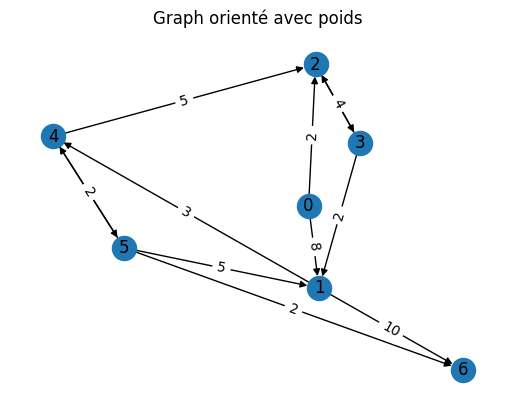

In [16]:

#                      0 1 2 3 4 5 6
matweight = np.array([[0,8,2,0,0,0,0], # 0
                      [0,0,0,0,3,0,10],# 1
                      [0,0,0,3,0,0,0], # 2
                      [0,2,4,0,0,0,0], # 3
                      [0,0,5,0,0,4,0], # 4
                      [0,5,0,0,2,0,2], # 5
                      [0,0,0,0,0,0,0]])# 6
show(matweight, "Graph orienté avec poids", 3)

In [18]:

def dijkstra(mat, dep, arr):
    """Return the path including dep and arr, and the total cost"""
    mat = mat.copy().astype(float)
    mat[mat == 0] = np.inf
    mat += np.identity(len(mat))  # To avoid just rotating the matrix
    dist = np.zeros(len(mat))
    dist[:] = np.inf
    dist[dep] = 0
    previous = np.zeros(len(mat), dtype=int)
    previous[:] = -1
    Q = list(range(len(mat)))
    while len(Q) > 0:
        u = Q[0]
        for n in Q:
            if dist[n] < dist[u]:
                u = n
        Q.remove(u)
        for v in range(len(mat)):
            if v in Q and dist[v] > dist[u] + mat[u, v]:
                dist[v] = dist[u] + mat[u, v]
                previous[v] = u
    path = [arr]
    while previous[path[-1]] != -1:
        path.append(previous[path[-1]])
    path.reverse()
    return path, dist[arr]
    

print(dijkstra(matweight, 0, 6))

([0, 2, 3, 1, 4, 5, 6], 16.0)


In [24]:
def floyd(mat):
    p = mat.copy().astype(float)
    w = mat.copy().astype(float)
    w[w == 0] = float('inf')
    np.fill_diagonal(w, 0)
    for i in range(len(p)):
        for j in range(len(p[i])):
            if (p[i, j] != 0):
                p[i, j] = j

    for k in range(len(w)):
        for i in range(len(w)):
            for j in range(len(w)):
                if w[i][j] > w[i][k] + w[k][j]:
                    w[i][j] = w[i][k] + w[k][j]
                    p[i][j] = k

    return w, p

w, mat = floyd(matweight)
print(w)
print(mat)

[[ 0.  7.  2.  5. 10. 14. 16.]
 [inf  0.  8. 11.  3.  7.  9.]
 [inf  5.  0.  3.  8. 12. 14.]
 [inf  2.  4.  0.  5.  9. 11.]
 [inf  9.  5.  8.  0.  4.  6.]
 [inf  5.  7. 10.  2.  0.  2.]
 [inf inf inf inf inf inf  0.]]
[[0. 3. 2. 2. 3. 4. 5.]
 [0. 0. 4. 4. 4. 4. 5.]
 [0. 3. 0. 3. 3. 4. 5.]
 [0. 1. 2. 0. 1. 4. 5.]
 [0. 5. 2. 2. 0. 5. 5.]
 [0. 1. 4. 4. 4. 0. 6.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [31]:
# NE FONCTIONNE PAS


# def reconstruct_path(p, start, end):
#     path = [start]
#     while path[-1] != end:
#         path.append(int(p[path[-1]][end]))
#     return path

# def shortest_path(mat, start, end):
#     w, p = floyd(mat)
#     shortest_distance = w[start][end]
#     if shortest_distance == float('inf'):
#         raise Exception("No path exists between the given vertices")
#     shortest_path = reconstruct_path(p, start, end)
#     return shortest_path, shortest_distance

# print(shortest_path(matweight, 0, 6))

([0, 5, 6], 16.0)


## Activité Simple et parser

On cherche à parser un système tel que :

$$
\begin{cases}
max z &= 4x + 5y \\
x + 2y &<= 800 \\
2x + y &<= 700 \\
x &<= 300
\end{cases}
$$

In [22]:
import numpy as np
import regex as re
np.seterr(divide='ignore')
np.set_printoptions(precision=3, suppress=True)

In [23]:
def getK(mat):
    feco = mat[-1, :-1]  # don't take the bottom right value
    return feco.argmax()


def getL(mat):
    secmembre = mat[:-1, -1]
    k = getK(mat)
    coef = mat[:, k]
    out = np.zeros(len(secmembre))

    for i in range(len(secmembre)):
        try:
            out[i] = secmembre[i] / coef[i]
        except ZeroDivisionError:
            out[i] = float("inf")
    return out.argmin()


def simplex(mat, varpos):
    mat = np.float64(mat)
    varpos = {v: k for k, v in varpos.items()}
    final_values = [x for x in varpos.values() if x.startswith("e")]
    while mat[-1, :].max() > 0:  # :-1 ?
        k = getK(mat)
        # print(f"K = {k+1}")
        # print(f"coef K = {mat[-1, k]}")
        l = getL(mat)
        # print(f"L = {l+1}")
        # print(f"coef L = {mat[l, -1]}")
        pivot = mat[l, k]
        # print(f"pivot = {pivot}")

        mat[l, :] /= pivot

        for i in range(len(mat)):
            if i != l:
                # / pivot, actually not divided by pivot, idk why
                mat[i, :] = mat[i, :] - (mat[i, k] * mat[l, :])
        final_values[l] = varpos[k]

    final_values = {k: mat[i, -1] for i, k in enumerate(final_values)}

    return mat, final_values

On introduit les différentes expressions régulières pour parser les contraintes et la fonction objectif

In [24]:
reSingleVar = r"(?P<sign>[+\-]?)\s*(?P<weight>\d*)(?P<var>[a-zA-Z])"
reWeightGroup = rf"(?P<weights>{reSingleVar}\s*)+"
reFuncEco = rf"(?P<func>max) (?P<funcparam>[a-zA-Z])\s*=\s*({reWeightGroup})"
reOperatorInequality = r"(?P<operator>[<>]=)"
reSecMemb = r"(?P<secmember>\d+)"
reInequality = rf"{reWeightGroup}\s*{reOperatorInequality}\s*{reSecMemb}"

In [25]:
def parse(instructions: list[str], verbose = False) -> np.ndarray:
    """Parse a system of inequalities into a matrix
        It must have exactly one max instruction with as many variables as you want. Example:
            max z = 30x + 50y (+ 40u + 60v...)
        and then as many inequalities as you want. Example:
            3x + 2y (+ 4u + 5v...) <= 1800
            x <= 400
            y <= 600
    """
    instructions = [ins.strip() for ins in instructions]

    # Fonction économique
    economic_function = [ins for ins in instructions if ins.startswith("max")]
    assert len(economic_function) == 1, "You must have exactly one max instruction"

    economic_function = economic_function[0]
    m = re.match(reFuncEco, economic_function)

    # remove the function from the list of instructions
    instructions.remove(economic_function)

    vars = []
    for part in m.captures("weights"):
        p = re.match(reSingleVar, part)
        assert p is not None, f"Invalid variable: {part}"
        w = int(p.group("sign") + p.group("weight"))
        v = p.group("var")
        vars.append((w, v))

    economic_function = {"func": m.captures("func")[0], "funcparam": m.captures(
        "funcparam")[0]}

    assert len(vars) == len(set([v for _, v in vars])
                            ), "Cannot have two variables with the same name"
    # print(vars)

    # Inégalités
    inequalities = []
    for inequality in instructions:
        m = re.match(reInequality, inequality)
        assert m is not None, f"Invalid inequality: {inequality}"
        ineq = {"op": m.captures("operator"), "secmember": m.captures(
            "secmember"), "vars": []}
        for part in m.captures("weights"):
            p = re.match(reSingleVar, part)
            assert p is not None, f"Invalid variable: {part}"
            w = p.group("weight")
            if w == "":
                w = "1"
            w = int(p.group("sign") + w)
            v = p.group("var")
            ineq["vars"].append((w, v))
        ineq["vars"].sort(key=lambda x: x[1])
        inequalities.append(ineq)

    # print(inequalities)

    # add missing variables in vars
    for ineq in inequalities:
        for _, v in ineq["vars"]:
            if v not in [v for _, v in vars]:
                vars.append((0, v))
    vars.sort(key=lambda x: x[1])

    varpos = {v: i for i, (_, v) in enumerate(vars)}

    if verbose:
        print("RECAP " + "="*20)
        print("economic function:", economic_function)
        print("vars:", " ".join([v for _, v in vars]))
        print("varpos:", varpos)
        print("weights:", vars)
        print("inequalities:")
        for ineq in inequalities:
            print(" ".join([str(w) + v for w, v in ineq["vars"]]), " ".join(
                ineq["op"]), " ".join(ineq["secmember"]))

    # create the matrix
    mat = np.zeros((len(inequalities)+1, len(vars)+len(inequalities)+1))

    # add the economic function
    for i, (w, v) in enumerate(vars):
        mat[-1, i] = w

    # add the inequalities
    for i, ineq in enumerate(inequalities):
        for w, v in ineq["vars"]:
            mat[i, varpos[v]] = w
        mat[i, len(vars)+i] = 1
        mat[i, -1] = int(ineq["secmember"][0])

    for i in range(len(inequalities)):
        varpos[f"e{i+1}"] = len(vars) + i
    return mat, varpos

On peut maintenant tester notre parser et resolver

In [26]:
# Parser
system, vars = parse(["max z = 4x + 5y",
                    "x + 2y <= 800",
                    "2x + y <= 700",
                    "x <= 300"])
print(system)
print(vars)

[[  1.   2.   1.   0.   0. 800.]
 [  2.   1.   0.   1.   0. 700.]
 [  1.   0.   0.   0.   1. 300.]
 [  4.   5.   0.   0.   0.   0.]]
{'x': 0, 'y': 1, 'e1': 2, 'e2': 3, 'e3': 4}


In [27]:
# resolver
mat_soluce, solution = simplex(system, vars)
print(mat_soluce)
print(solution)

[[    0.        1.        0.667    -0.333     0.      300.   ]
 [    1.        0.       -0.333     0.667     0.      200.   ]
 [    0.        0.        0.333    -0.667     1.      100.   ]
 [    0.        0.       -2.       -1.        0.    -2300.   ]]
{'y': 300.0, 'x': 200.0, 'e3': 100.0}


## TP3 Recuit simulé & Voyageur de commerce